### Credit Card Fraud Detection

Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as prfs
from scipy.stats import multivariate_normal

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('No Frauds {0}% of the dataset'.format(str(len(data[data['Class']==0])*100/len(data))))
print('Frauds {0}% of the dataset'.format(str(len(data[data['Class']==1])*100/len(data))))

No Frauds 99.827251436938% of the dataset
Frauds 0.1727485630620034% of the dataset


Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will assume that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

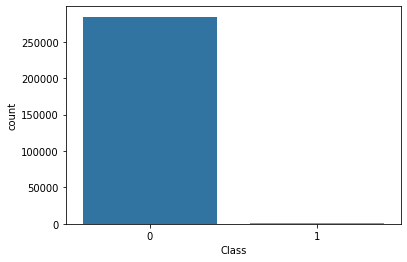

In [8]:
sns.countplot(x='Class',data=data)

#### How different are the amount used in different transaction classes?

In [9]:
data.loc[data['Class'] == 0, 'Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
data.loc[data['Class'] == 1, 'Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# Number of fraud cases in dataset
frauds = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [12]:
pd.set_option('precision', 3)
data.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


Time variable
284802    47.996
284803    47.996
284804    47.997
284805    47.997
284806    47.998
Name: Time_Hr, dtype: float64


Text(0, 0.5, 'Transactions')

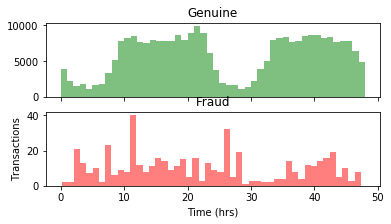

In [13]:
#Plot Time to see if there is any trend
print("Time variable")
data["Time_Hr"] = data["Time"]/3600 # convert to hours
print(data["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Transactions')

"Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes. So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse I will later test this assumption. For now, I'll keep this feature in data frame. I will drop "Time" but keep "Time_Hr".

In [14]:
data = data.drop(['Time'],axis=1)

Text(0, 0.5, 'Transactions')

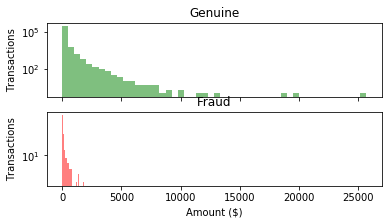

In [15]:
#let us check Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('Transactions')
ax4.hist(data.Amount[data.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('Transactions')

Note:- All transaction amounts > 10K in Genuine Class only. Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar.

##### Use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance

In [16]:
from sklearn.preprocessing import StandardScaler
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

### t-SNE Visualization
t-SNE (t-distributed stochastic neighbor embedding) is a visualization technique used to visualize high dimensional data. It starts by calculating the probability of similarity of points in high-dimensional space and probability of similarity of points in the corresponding low-dimensional space. It then uses a gradient descent method to minimize the error (sum of difference of proabilities of high and corresponding low dimension).

In [17]:
#Sampling the dataset for tsne algorithm
tsne_data_fraud = data[data.Class==1]
tsne_data_normal = data[data.Class==0].sample(frac=0.1, random_state=1)
print(tsne_data_fraud.shape)
print(tsne_data_normal.shape)

(492, 31)
(28432, 31)


t-SNE is very time consuming and it directly relates to the amount of the data given to it. Performing it on 284807 transactions is not practical given the gig i have, hence, I am only taking a fraction of it, which corresponds to around 15000 examples.

In [18]:
from sklearn.utils import shuffle
tsne_data = tsne_data_fraud.append(tsne_data_normal, ignore_index=True)
tsne_data = shuffle(tsne_data)
label = tsne_data.iloc[:, -1]
tsne_data = tsne_data.iloc[:, :30]
tsne_data = tsne_data.astype(np.float64)

standard_scaler = StandardScaler()
tsne_data = standard_scaler.fit_transform(tsne_data)

print(tsne_data.shape)
print(label.shape) 

(28924, 30)
(28924,)


In [19]:
#Performing dimension reduction (tsne)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(tsne_data)

In [20]:
print(tsne_data.shape)
tsne_plot = np.vstack((tsne_data.T, label))
tsne_plot = tsne_plot.T
print(tsne_plot.shape)

(28924, 2)
(28924, 3)


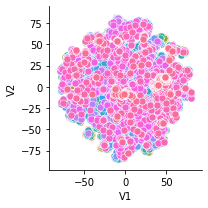

In [21]:
#Plotting the tsne results
#plt.rcParams['figure.figsize'] = (15,8)
tsne_plot = pd.DataFrame(data=tsne_plot, columns=("V1", "V2", "Class"))

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tsne_plot,hue="Class")
g = (g.map(plt.scatter, "V1", "V2", **kws))

We can see how most of the anomilies are clustered together in groups. So we need an efficient anomaly detection technique and train it to identify those points as outliers and hence brand them as anomalies.

### Multivariate Gaussian Anomaly Detection:
I will be using multivariate gaussian anomaly detection.

Anomaly Detection Algorithm Steps :-
<br>1.Divide the dataset into 3 parts: training set(only normal cases), cross-validation set(normal + fraud) and test set(normal + fraud).</br>
<br> 2.Fit the model p(x) by finding the mean and co-variance matrix using the training set.</br>
<br> 3.Use cross-validation set to find an optimal epsilon.</br>
<br> 4.Apply the model on test set. For any new data, its p(x) will be calculated and it will be marked as an anomaly if it is less than epsilon.

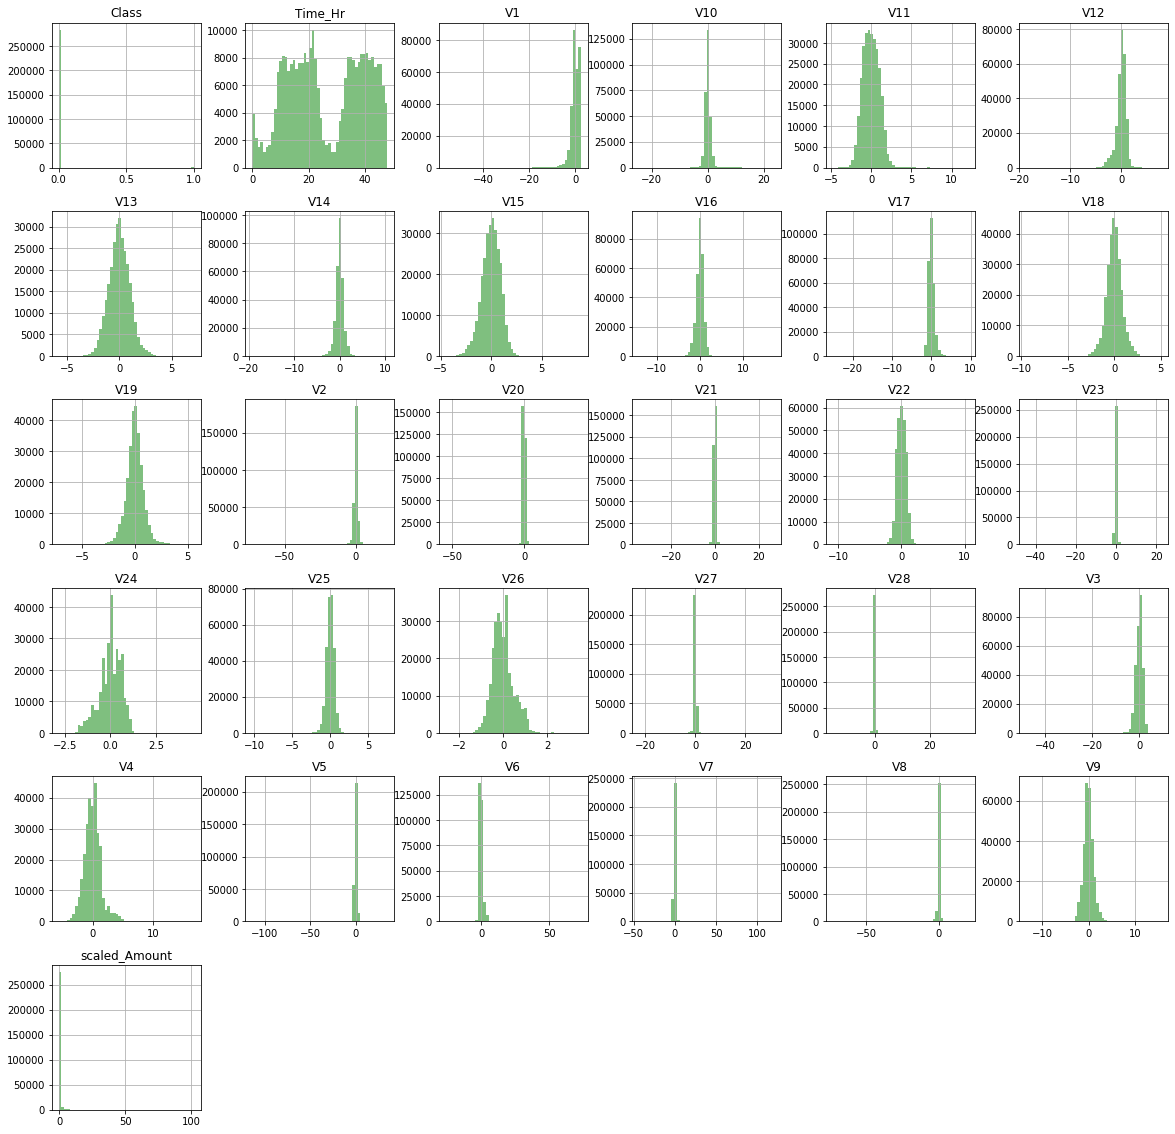

In [22]:
#Visualizing each feature separately
data.hist(figsize=(20,20), bins=50, color="green", alpha=0.5)
plt.show()

In [23]:
#Creating train, cross-validation and test set
df_fraud = shuffle(data[data.Class==1])
df_normal = shuffle(data[data.Class==0].sample(n=280000))
print(df_fraud.shape)
print(df_normal.shape)
df_train = df_normal.iloc[:240000, :].drop(labels = ["Class","Time_Hr"], axis = 1)
df_cross = shuffle(df_normal.iloc[240000:260000, :].append(df_fraud.iloc[:246, :]))
Y_cross = df_cross.loc[:, "Class"]
df_cross = df_cross.drop(labels = ["Class", "Time_Hr"], axis = 1)
df_test = shuffle(df_normal.iloc[260000:, :].append(df_fraud.iloc[246:, :]))
Y_test = df_test.loc[:, "Class"]
df_test = df_test.drop(labels = ["Class", "Time_Hr"], axis = 1)
print(df_train.shape)
print(df_cross.shape)
print(Y_cross.shape)
print(df_test.shape)
print(Y_test.shape)

(492, 31)
(280000, 31)
(240000, 29)
(20246, 29)
(20246,)
(20246, 29)
(20246,)


In [24]:
#Defining fuctions to calculate mean, cov and gaussian probablities
def mean_variance(data):
    mean = np.mean(data, axis=0)
    cov = np.cov(data.T)
    return mean, cov

def gaussian_dist(data, mean, cov):
    prob = multivariate_normal.pdf(data, mean=mean, cov=cov)
    return prob

In [25]:
#Fitting the model for train, cross and test set using mean and cov from train_set
mean, cov = mean_variance(df_train)
print(mean.shape)
print(cov.shape)
prob_train = gaussian_dist(df_train, mean, cov)
prob_cross = gaussian_dist(df_cross, mean, cov)
prob_test = gaussian_dist(df_test, mean, cov)

print(prob_train.shape)
print(prob_cross.shape)
print(prob_test.shape)

(29,)
(29, 29)
(240000,)
(20246,)
(20246,)


In [26]:
#Using cross-validation set to find the optimum epsilon
def optimize_for_epsilon(prob_train, prob_cross, Y_cross):
    best_f1 = 0
    max_e = 2.062044871798754e-79
    min_e = prob_train.min()
    step = (max_e - min_e) / 1000
    
    for e in np.arange(prob_cross.min(), max_e, step):
        Y_cross_pred = prob_cross < e
        precision, recall, f1_score, support = prfs(Y_cross, Y_cross_pred, average="binary")
        print("for epsilon: {}".format(e))
        print("f1_score: {}".format(f1_score))
        print("recall: {}".format(recall))
        print("precision: {}".format(precision))
        print("support: {}".format(support))
        print()
        
        if f1_score > best_f1:
            best_f1 = f1_score
            best_epsilon = e
            recall = recall
        
    return best_f1, best_epsilon, recall

best_f1, best_epsilon, recall = optimize_for_epsilon(prob_train, prob_cross, Y_cross)
print(best_f1, best_epsilon, recall)

for epsilon: 0.0
f1_score: 0.0
recall: 0.0
precision: 0.0
support: None

for epsilon: 2.062044871798754e-82
f1_score: 0.7188612099644127
recall: 0.8211382113821138
precision: 0.6392405063291139
support: None



C:\Users\NC3962\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


for epsilon: 4.124089743597508e-82
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 6.186134615396262e-82
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 8.248179487195016e-82
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 1.0310224358993771e-81
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 1.2372269230792523e-81
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 1.4434314102591278e-81
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 1.6496358974390033e-81
f1_score: 0.7150442477876106
recall: 0.8211382113821138
precision: 0.6332288401253918
support: None

for epsilon: 1.8558403846188787e-81
f1_score

for epsilon: 1.3197087179512026e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.34032916666919e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.3609496153871777e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.3815700641051652e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.4021905128231527e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.4228109615411404e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.4434314102591278e-80
f1_score: 0.7125220458553791
recall: 0.8211382113821138
precision: 0.6292834890965732
support: None

for epsilon: 1.4640518589771153e-80
f1_scor

for epsilon: 2.5775560897484426e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.5981765384664303e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.6187969871844176e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.6394174359024052e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.660037884620393e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.68065833333838e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.701278782056368e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 2.7218992307743555e-80
f1_score:

for epsilon: 3.8766443589816575e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 3.897264807699645e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 3.917885256417633e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 3.93850570513562e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 3.9591261538536075e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 3.9797466025715955e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 4.000367051289583e-80
f1_score: 0.7112676056338029
recall: 0.8211382113821138
precision: 0.6273291925465838
support: None

for epsilon: 4.020987500007571e-80
f1_score: 0

for epsilon: 5.1963530769328605e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.216973525650848e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.237593974368835e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.258214423086823e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.2788348718048104e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.299455320522798e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.320075769240786e-80
f1_score: 0.7087719298245615
recall: 0.8211382113821138
precision: 0.6234567901234568
support: None

for epsilon: 5.340696217958773e-80
f1_score: 0

for epsilon: 6.4542004487301e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.4748208974480874e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.4954413461660755e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.516061794884063e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.53668224360205e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.557302692320038e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.5779231410380254e-80
f1_score: 0.7075306479859895
recall: 0.8211382113821138
precision: 0.6215384615384615
support: None

for epsilon: 6.5985435897560134e-80
f1_score: 0.

for epsilon: 7.79452961539929e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.815150064117278e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.835770512835266e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.856390961553253e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.87701141027124e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.897631858989228e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.918252307707215e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 7.938872756425204e-80
f1_score: 0.706

for epsilon: 9.052376987196531e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.072997435914518e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.093617884632505e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.114238333350493e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.13485878206848e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.155479230786469e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.176099679504456e-80
f1_score: 0.7062937062937062
recall: 0.8211382113821138
precision: 0.6196319018404908
support: None

for epsilon: 9.196720128222443e-80
f1_score: 0.70

for epsilon: 1.0372085705147732e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0392706153865721e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0413326602583708e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0433947051301696e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0454567500019683e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.047518794873767e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0495808397455658e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.0516428846173646e-79
f1_score: 0.7

for epsilon: 1.1691794423098935e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1712414871816923e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1733035320534911e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1753655769252899e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1774276217970886e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1794896666688873e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.181551711540686e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.1836137564124848e-79
f1_score: 0.7

for epsilon: 1.3011503141050138e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3032123589768126e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3052744038486113e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.30733644872041e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3093984935922089e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3114605384640076e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3135225833358063e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.3155846282076051e-79
f1_score: 0.70

for epsilon: 1.4351832307719327e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.4372452756437317e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.4393073205155305e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.4413693653873292e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.443431410259128e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.4454934551309266e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.4475555000027254e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.449617544874524e-79
f1_score: 0.70


for epsilon: 1.5671541025670531e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.569216147438852e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.5712781923106506e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.5733402371824493e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.575402282054248e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.5774643269260468e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.5795263717978455e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.5815884166696443e-79
f1_score: 0.7

for epsilon: 1.7486140512853434e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.750676096157142e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.7527381410289408e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.7548001859007396e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.7568622307725386e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.7589242756443373e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.760986320516136e-79
f1_score: 0.7050610820244329
recall: 0.8211382113821138
precision: 0.617737003058104
support: None

for epsilon: 1.7630483653879348e-79
f1_score: 0.70

for epsilon: 1.9156396859010425e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.9177017307728413e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.91976377564464e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.9218258205164387e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.9238878653882374e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.9259499102600362e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.9280119551318352e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 1.930074000003634e-79
f1_score

for epsilon: 2.0496726025679614e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 2.0517346474397604e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 2.0537966923115592e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 2.055858737183358e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 2.0579207820551566e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

for epsilon: 2.0599828269269554e-79
f1_score: 0.7073170731707317
recall: 0.8252032520325203
precision: 0.6189024390243902
support: None

0.7188612099644127 2.062044871798754e-82 0.8252032520325203


In [27]:
#Predicting the anomalies on test_set using the optimal epsilon from above results
Y_test_pred = prob_test < best_epsilon
precision, recall, f1_score, ignore = prfs(Y_test, Y_test_pred, average="binary")
print("epsilon: {}".format(best_epsilon))
print("f1_score: {}".format(f1_score))
print("recall: {}".format(recall))
print("precision: {}".format(precision))

epsilon: 2.062044871798754e-82
f1_score: 0.6942446043165467
recall: 0.7845528455284553
precision: 0.6225806451612903


Note: Values mentioned might vary a bit with the above results as the model gives a bit different results in different epochs.

We were able to achieve f1 score of 0.70 and were able to catch almost 80% of the fraud cases (0.79 recall) with around 64% precision. We can increase f1 score even more but then recall will reduce as there will be a trade off between recall and precision and i personally think catching more of the frauds even if we get some false positives along with is more important rather than improving precision and missing lots of fraud cases.